In [1]:
# Import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
df=pd.read_csv("C:/Users/chitt/Downloads/archive (4)/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Remove listings with extreme prices (keep price <= 500)
df = df[df['price'] <= 500]

# Remove listings with very long minimum stays (keep minimum_nights <= 30)
df = df[df['minimum_nights'] <= 30]

# Fill missing values in reviews_per_month with 0 
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

#check if any nulls remain
df.isnull().sum()


id                                   0
name                                15
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9346
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
# Drop columns 
df = df.drop(columns=['name', 'host_name', 'last_review'])

C:\Users\chitt\AppData\Local\Temp\ipykernel_31228\2054533279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


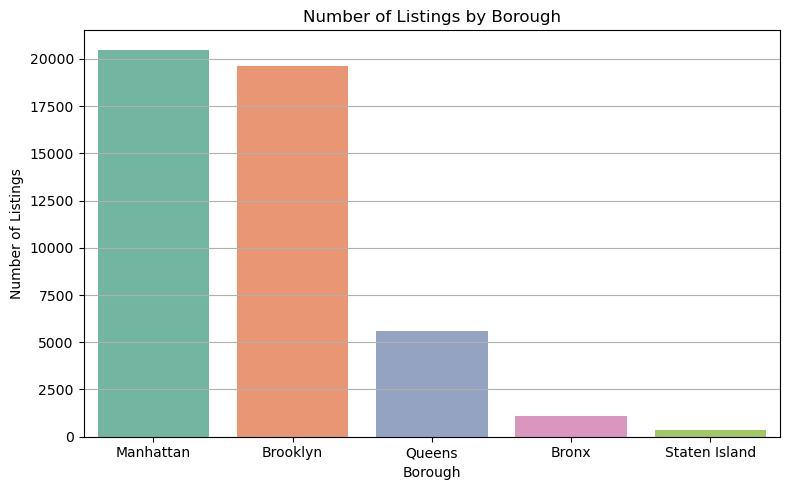

In [7]:
# Set figure size
plt.figure(figsize=(8, 5))

# CountPlot: number of listings in each borough
sns.countplot(
    data=df,
    x='neighbourhood_group',
    order=df['neighbourhood_group'].value_counts().index,
    palette='Set2'
)

# Title and labels
plt.title("Number of Listings by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\chitt\AppData\Local\Temp\ipykernel_31228\1130151421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_price.index, y=room_price.values, palette='Set3')


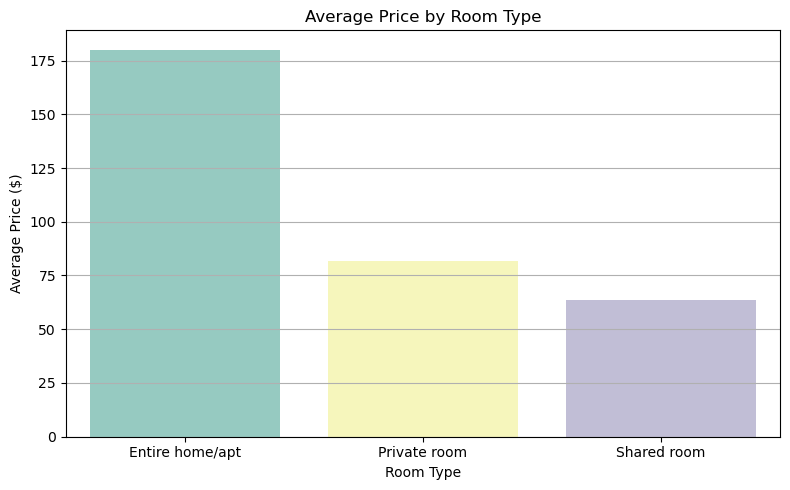

In [9]:
# Group by room type and calculate average price
room_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=room_price.index, y=room_price.values, palette='Set3')

plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [10]:
print(room_price)

room_type
Entire home/apt    180.044484
Private room        81.839873
Shared room         63.663436
Name: price, dtype: float64


C:\Users\chitt\AppData\Local\Temp\ipykernel_31228\3315221073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


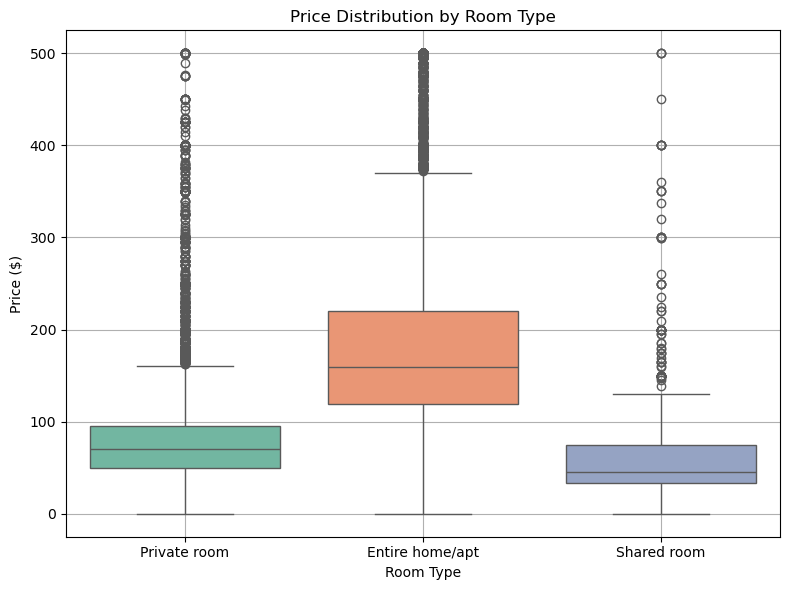

In [11]:
filtered_df = df[df['price'] <= 500]

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='room_type',
    y='price',
    data=filtered_df,
    palette='Set2'
)

plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\chitt\AppData\Local\Temp\ipykernel_15672\1675209812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


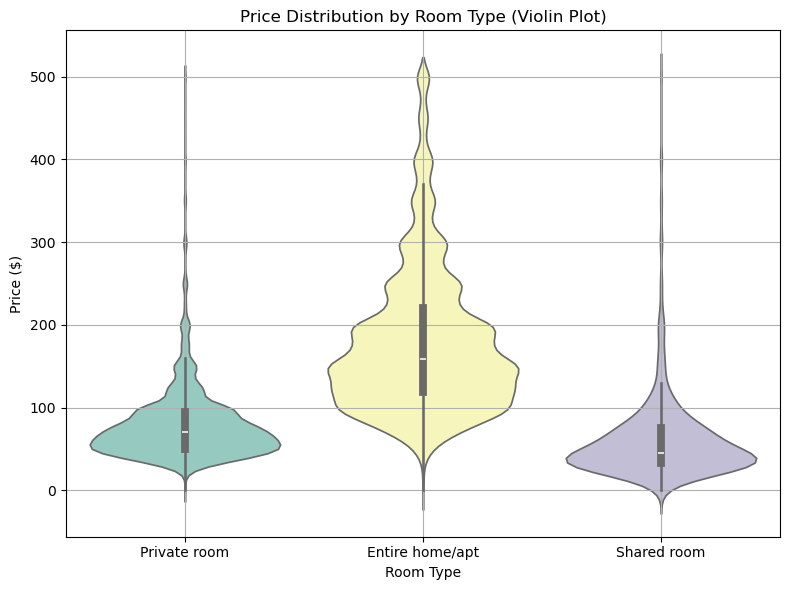

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='room_type',
    y='price',
    data=filtered_df,
    palette='Set3'
)

plt.title("Price Distribution by Room Type (Violin Plot)")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


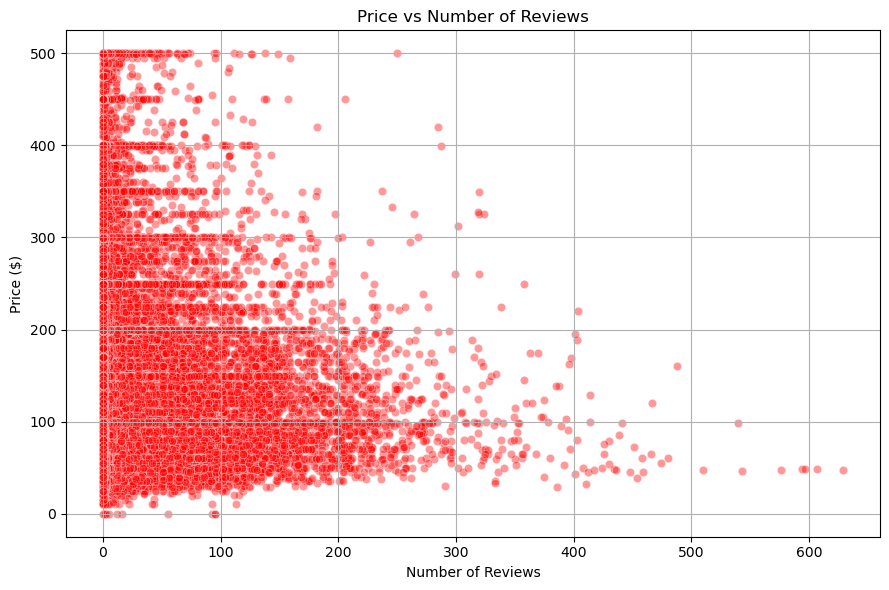

In [12]:
# Use filtered dataset (price <= 500)
plt.figure(figsize=(9, 6))

sns.scatterplot(
    data=filtered_df,
    x='number_of_reviews',
    y='price',
    alpha=0.4,              # Slight transparency to handle overlapping
    color='red'
)

plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


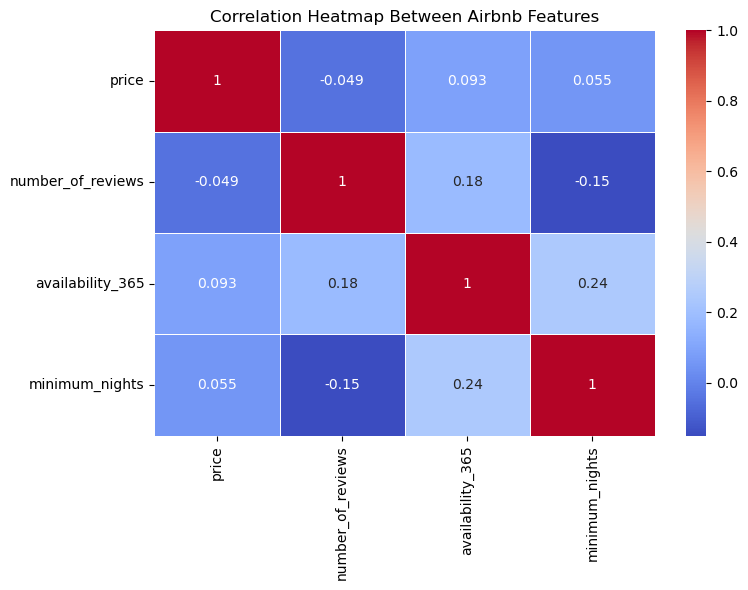

In [13]:
plt.figure(figsize=(8, 6))

# Compute correlation matrix
corr_matrix = filtered_df[['price', 'number_of_reviews', 'availability_365', 'minimum_nights']].corr()

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
)

plt.title("Correlation Heatmap Between Airbnb Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Project Summary:Airbnb NYC 2019 Exploratory Data Analysis

In this project, I explored the Airbnb listing dataset from New York (2019) to understand patterns in price, room type, availability, and guest activity.

Here's what I found:

- 🗺️ Manhattan had the highest number of listings, while Bronx and Staten Island had the least.  
- 🛏️ Entire homes/apartments were the most expensive (avg ~$180), followed by private rooms and shared rooms.  
- 📦 Box and violin plots revealed large price variations in entire homes, with many outliers across all room types.  
- 📈 Scatter plots showed that lower-priced listings tend to receive more reviews, suggesting they are more popular or affordable.  
- 🌡️ Correlation analysis confirmed:
  - `Price and number of reviews` have a slight negative correlation  
  - `Listings with longer minimum stays` are reviewed less often  
  - `Availability and minimum nights` had a weak positive link  
